---
title: "Python Foundations for Numerical Methods"
author: "Shivram Sambhus"
format: 
  html:
    code-fold: false
    page-layout: full
    grid:
        body-width: 1200px
  pdf: default
jupyter: python3
toc: true

---

## What This Guide Is

This is not a beginner's tutorial. This guide assumes you already understand programming concepts: loops, functions, data structures. What you may not have is a deep, precise understanding of *how Python actually works* and how to harness it effectively for numerical computing.

This guide builds that mental model—from practical environment setup, through language mechanics, to the powerful numerical libraries (NumPy, SciPy) and visualization tools (Matplotlib) that form the backbone of computational science.

By the end, you will understand not just *what* Python code does, but *why* it works that way.

## The Learning Arc

This guide follows a carefully designed progression:

1. **Python Foundations** → Understand how Python works (variables, control flow, functions, OOP)
2. **NumPy Essentials** → Master array computing and linear algebra
3. **SciPy Basics** → Apply specialized algorithms for numerical methods
4. **Matplotlib** → Visualize results and validate computations

Each section builds on the previous. Each concept is followed immediately by executable code so you can experiment and understand interactively.

## A Note on Interactivity

Throughout this guide, you will see explanation cells followed by code cells. **This is intentional.** Theory without practice is hollow. Practice without theory is hollow too. They are integrated here—read, then run, then modify, then understand.

All code examples are self-contained. You can modify them, break them, extend them. That experimentation is where learning happens.

---

## Complete Table of Contents

### Part I: Python Foundations

- Introduction to Python
- Variables and Data Types
- Container Types
- Control Flow
- Functions and Scope
- Input, Output, and File I/O
- Modules and Imports
- Object-Oriented Programming

### Part II: NumPy for Numerical Computing

- Why NumPy? Speed and Semantics
- Creating Arrays
- Inspecting Arrays
- Indexing and Slicing
- Array Operations and Broadcasting
- Joining and Splitting
- Searching and Filtering
- Iteration Patterns
- Linear Algebra Fundamentals

### Part III: SciPy for Advanced Algorithms

- SciPy Ecosystem Overview
- Linear Algebra (Advanced)
- Optimization
- Integration and Differential Equations
- Interpolation and Fitting
- Statistics

### Part IV: Visualization with Matplotlib

- Plotting Fundamentals
- Styling and Customization
- Common Plot Types
- Advanced Visualizations

---

# Part I: Python Foundations

## Understand How Python Works

Before you write numerical code, you need to understand the language itself. Not superficially—but at a level where you can predict behavior, avoid common pitfalls, and write efficient code.

This part builds that foundation.

---


## Introduction to Python

### What is Python?

Python is a high-level, interpreted programming language created in 1991. The crucial word here is *interpreted*: when you write Python code, you run it immediately. There is no separate compilation step. The interpreter reads your code line by line and executes it.

This matters for your work because:
- You get immediate feedback (great for exploration)
- Rapid prototyping is natural
- The same code runs on any machine with Python installed

For a more complete guide on Python: https://cs.shivi.io/03-Teaching/Python/A-Guide-to-Python

Let us see the difference between an interpreted language (Python) and a compiled language (like C):

In [1]:
# Python: Interpreted
# Save as hello.py, then run: python hello.py
x = 5
print(x * 2)


10


Compare to C, which requires separate compilation:

```c
// C: Compiled
#include <stdio.h>
int main() {
    int x = 5;
    printf("%d
", x * 2);
    return 0;
}
// Compile: gcc hello.c -o hello
// Run: ./hello
```

In Python, you skip the compilation step. Code runs immediately.

### Why Python for Numerical Methods?

In this course, Python is not arbitrary. It is chosen because:

**1. Numerical libraries exist.** NumPy and SciPy provide efficient, well-tested implementations of algorithms you need: linear algebra, optimization, integration, statistics.

**2. You can focus on algorithms, not language mechanics.** Python is readable. You write what you mean. There are no pointer dereferencing, memory management headaches, or verbose boilerplate.

**3. Heavy computations run fast.** The numerical libraries are written in C and Fortran. Python is the orchestration layer. You get both readability AND performance.

**4. Visualization is built-in.** Matplotlib makes plotting natural and quick.

Let us verify the speed claim. Here is NumPy versus plain Python:

In [2]:
import numpy as np
import time

# Pure Python: multiply 1 million numbers by 2
n = 1_000_000
python_list = list(range(n))

start = time.time()
result_py = [x * 2 for x in python_list]
time_py = time.time() - start

# NumPy: same operation
numpy_array = np.arange(n)

start = time.time()
result_np = numpy_array * 2
time_np = time.time() - start

print(f'Python list: {time_py:.4f} seconds')
print(f'NumPy array: {time_np:.4f} seconds')
print(f'Speedup: {time_py / time_np:.0f}x faster')


Python list: 0.0387 seconds
NumPy array: 0.0031 seconds
Speedup: 12x faster


The speedup is real. This is why we use NumPy for large-scale numerical work.

### How to Run Python

There are three ways:

**1. Interactive REPL (Read-Eval-Print Loop)**
```
$ python
>>> x = 5
>>> print(x * 2)
10
```
Useful for quick experiments and debugging.

**2. Scripts (.py files)**
```
$ python my_script.py
```
For organized, repeatable code.

**3. Jupyter Notebooks (this format)**
Combines text, code, and visualizations. Perfect for exploration, teaching, and reproducible research.

In this course, we use Jupyter notebooks. Code cells can be executed individually, and you can see results immediately. This is the environment you are in now.

---

## Variables and Data Types

### The Python Type System

Python is *dynamically typed*. You do not declare types in advance. The interpreter figures out what type a value is at runtime. This is different from Java or C++, where you must declare: `int x = 5;`

In Python:

In [3]:
x = 5
y = 3.14
z = 'hello'
flag = True

print(type(x))
print(type(y))
print(type(z))
print(type(flag))


<class 'int'>
<class 'float'>
<class 'str'>
<class 'bool'>


The interpreter inferred the types: `int`, `float`, `str`, `bool`. This flexibility is powerful and concise. The tradeoff is that type errors only appear at runtime, not during a compile phase.

### The Core Data Types

#### Integers: Arbitrary Precision

In Python, integers do not overflow. You can compute absurdly large numbers:

In [4]:
n = 2 ** 100
print(f'2^100 = {n}')
print(f'Number of digits: {len(str(n))}')


2^100 = 1267650600228229401496703205376
Number of digits: 31


Compare this to C or Java, where `int` has fixed limits. Python integers scale automatically.

#### Floats: IEEE 754 Double Precision

Floats are 64-bit numbers following the IEEE 754 standard. This means they exhibit rounding errors:

In [5]:
x = 0.1 + 0.2
print(f'0.1 + 0.2 = {x}')
print(f'Is it equal to 0.3? {x == 0.3}')


0.1 + 0.2 = 0.30000000000000004
Is it equal to 0.3? False


This is not a Python bug. It is how floating-point arithmetic works on all computers. When comparing floats, always use `math.isclose()`:

In [6]:
import math

x = 0.1 + 0.2
print(f'math.isclose(x, 0.3): {math.isclose(x, 0.3)}')


math.isclose(x, 0.3): True


This is crucial for numerical methods. Small rounding errors accumulate. Understanding them is essential.

#### Strings: Unicode Sequences

Strings are immutable sequences of Unicode characters:

In [7]:
s = 'Numerical Methods'
print(f'First character: {s[0]}')
print(f'Last character: {s[-1]}')
print(f'Slice [0:10]: {s[0:10]}')
print(f'Reversed: {s[::-1]}')


First character: N
Last character: s
Slice [0:10]: Numerical 
Reversed: sdohteM laciremuN


Immutable means you cannot modify a string in place. Every operation creates a new string.

#### Booleans: True and False

Booleans have two values. But Python also has a concept of *truthiness*—any value can be evaluated as true or false:

In [8]:
# Falsy values: False, None, 0, 0.0, '', [], {}
# Truthy values: everything else

values = [0, [], '', None, 1, [1,2], 'hello']

for v in values:
    if v:
        print(f'{repr(v):15} is truthy')
    else:
        print(f'{repr(v):15} is falsy')


0               is falsy
[]              is falsy
''              is falsy
None            is falsy
1               is truthy
[1, 2]          is truthy
'hello'         is truthy


This is used implicitly throughout Python. Understanding truthiness prevents subtle bugs.

#### Complex Numbers: Built-In

Unlike Java or C++, Python has native support for complex numbers:

In [9]:
z = 3 + 4j  # note: 'j' for imaginary unit, not 'i'
print(f'z = {z}')
print(f'Real part: {z.real}')
print(f'Imaginary part: {z.imag}')
print(f'Magnitude: {abs(z)}')


z = (3+4j)
Real part: 3.0
Imaginary part: 4.0
Magnitude: 5.0


This is useful in numerical methods: eigenvalues, FFTs, differential equations often involve complex numbers.

---

## Container Types

### Lists: Mutable, Ordered

A list is a mutable, ordered collection. It is Python's closest equivalent to an array:

In [10]:
nums = [10, 20, 30]
print(f'Original: {nums}')

nums.append(40)
print(f'After append(40): {nums}')

nums[1] = 99
print(f'After nums[1] = 99: {nums}')


Original: [10, 20, 30]
After append(40): [10, 20, 30, 40]
After nums[1] = 99: [10, 99, 30, 40]


Lists support indexing and slicing:

In [11]:
nums = [10, 20, 30, 40, 50]
print(f'nums[0]: {nums[0]}')
print(f'nums[-1]: {nums[-1]}')
print(f'nums[1:4]: {nums[1:4]}')
print(f'nums[::-1]: {nums[::-1]}')


nums[0]: 10
nums[-1]: 50
nums[1:4]: [20, 30, 40]
nums[::-1]: [50, 40, 30, 20, 10]


### Tuples: Immutable, Ordered

A tuple is like a list, but immutable (cannot be modified):

In [12]:
pt = (3, 4)
print(f'Tuple: {pt}')

x, y = pt  # unpacking
print(f'Unpacked: x={x}, y={y}')

# Try to modify (will fail)
try:
    pt[0] = 5
except TypeError as e:
    print(f'Error: {e}')


Tuple: (3, 4)
Unpacked: x=3, y=4
Error: 'tuple' object does not support item assignment


Tuples are used for returning multiple values, ensuring data integrity, and as dictionary keys.

### Dictionaries: Key-Value Pairs

A dictionary maps keys to values. It is implemented as a hash map (very fast lookup):

In [13]:
scores = {'Alice': 10, 'Bob': 9, 'Carol': 8}
print(f'scores["Alice"]: {scores["Alice"]}')

scores['Dave'] = 7
print(f'After adding Dave: {scores}')

print(f'Keys: {list(scores.keys())}')
print(f'Values: {list(scores.values())}')


scores["Alice"]: 10
After adding Dave: {'Alice': 10, 'Bob': 9, 'Carol': 8, 'Dave': 7}
Keys: ['Alice', 'Bob', 'Carol', 'Dave']
Values: [10, 9, 8, 7]


Key operations are O(1) on average—very fast, regardless of dictionary size.

### Sets: Unique Elements

A set stores unique elements with fast membership testing:

In [14]:
A = {1, 2, 3, 3, 4}  # duplicates are removed
B = {3, 4, 5}

print(f'A: {A}')
print(f'B: {B}')
print(f'Union (A | B): {A | B}')
print(f'Intersection (A & B): {A & B}')
print(f'Difference (A - B): {A - B}')


A: {1, 2, 3, 4}
B: {3, 4, 5}
Union (A | B): {1, 2, 3, 4, 5}
Intersection (A & B): {3, 4}
Difference (A - B): {1, 2}


Sets are useful for removing duplicates and fast membership tests.

---

## Control Flow

Programs need to make decisions and repeat actions. Python provides conditionals, loops, and comprehensions for this.

### Conditionals: if, elif, else

In [15]:
x = 10
if x > 0:
    print('Positive')
elif x == 0:
    print('Zero')
else:
    print('Negative')

Positive


Indentation is syntax in Python. It defines code blocks. Use 4 spaces consistently.

### Truthiness in Conditions

Any value can be used in a condition. The falsy values are: `False`, `None`, `0`, `0.0`, empty string, empty list, empty dict. Everything else is truthy.

In [16]:
# Demonstrate truthiness
values = [[], [1], 0, 1, '', 'hello']
for v in values:
    if v:
        print(f'{repr(v):20} -> truthy')
    else:
        print(f'{repr(v):20} -> falsy')

[]                   -> falsy
[1]                  -> truthy
0                    -> falsy
1                    -> truthy
''                   -> falsy
'hello'              -> truthy


### Loops: for and while

In [17]:
# while loop
i = 0
while i < 5:
    print(i, end=' ')
    i += 1
print()

0 1 2 3 4 


In [18]:
# for loop over a range
for i in range(5):
    print(i, end=' ')
print()

0 1 2 3 4 


In [19]:
# for loop over a sequence
names = ['Alice', 'Bob', 'Carol']
for name in names:
    print(name)

Alice
Bob
Carol


### Loop Control: break, continue

In [20]:
# Find first multiple of 7
for n in range(1, 101):
    if n % 7 == 0:
        print(f'First multiple of 7: {n}')
        break

First multiple of 7: 7


In [21]:
# Skip even numbers
for n in range(10):
    if n % 2 == 0:
        continue
    print(f'{n} is odd', end=' ')
print()

1 is odd 3 is odd 5 is odd 7 is odd 9 is odd 


### Comprehensions: Elegant List Construction

In [22]:
# List comprehension: create list of squares
squares = [x**2 for x in range(5)]
print(f'Squares: {squares}')

# With condition
evens_squared = [x**2 for x in range(10) if x % 2 == 0]
print(f'Evens squared: {evens_squared}')

Squares: [0, 1, 4, 9, 16]
Evens squared: [0, 4, 16, 36, 64]


In [23]:
# Dict comprehension
square_dict = {x: x**2 for x in range(5)}
print(f'Dict: {square_dict}')

Dict: {0: 0, 1: 1, 2: 4, 3: 9, 4: 16}


In [24]:
# Set comprehension
unique_squares = {x**2 for x in [-2, -1, 0, 1, 2]}
print(f'Unique squares: {unique_squares}')

Unique squares: {0, 1, 4}


Comprehensions are more concise, more readable, and often faster than explicit loops. Use them.

### Iteration Utilities

In [25]:
# enumerate: index + value
for i, name in enumerate(['Ada', 'Alan', 'Grace']):
    print(f'{i}: {name}')

0: Ada
1: Alan
2: Grace


In [26]:
# zip: parallel iteration
names = ['Ada', 'Alan', 'Grace']
scores = [10, 7, 9]
for name, score in zip(names, scores):
    print(f'{name} -> {score}')

Ada -> 10
Alan -> 7
Grace -> 9


In [27]:
# any and all
nums = [2, 4, 6, 8]
print(f'any(n > 5 for n in nums): {any(n > 5 for n in nums)}')
print(f'all(n > 0 for n in nums): {all(n > 0 for n in nums)}')

any(n > 5 for n in nums): True
all(n > 0 for n in nums): True


---

## Functions and Scope

Functions let you group code into reusable blocks. In Python, functions are first-class objects: you can pass them around, store them in variables, and create them at runtime.

### Defining Functions

In [28]:
def greet(name):
    return f'Hello, {name}!'

result = greet('Alice')
print(result)

Hello, Alice!


### Parameters and Default Values

In [29]:
def power(base, exponent=2):
    return base ** exponent

print(power(3))          # uses default exponent=2
print(power(3, 4))       # override default
print(power(exponent=3, base=2))  # keyword arguments

9
81
8


### Variable-Length Arguments

In [30]:
def add_many(*args):
    return sum(args)

print(add_many(1, 2, 3, 4, 5))

15


In [31]:
def print_kwargs(**kwargs):
    for key, value in kwargs.items():
        print(f'{key} = {value}')

print_kwargs(name='Alice', age=30, city='Zurich')

name = Alice
age = 30
city = Zurich


### Scope and Lifetime

In [32]:
x = 'global'

def outer():
    y = 'outer'
    def inner():
        z = 'inner'
        print(f'{x}, {y}, {z}')
    inner()

outer()

global, outer, inner


Variables are looked up in this order: local scope → enclosing scope → global scope → built-in scope. This is called the LEGB rule.

### Lambda Functions (Anonymous)

In [33]:
# Lambda: shorthand for simple functions
square = lambda x: x**2
print(square(5))

# Useful with map and filter
nums = [1, 2, 3, 4, 5]
squared = list(map(lambda x: x**2, nums))
print(squared)

25
[1, 4, 9, 16, 25]


However, list comprehensions are usually more Pythonic than lambda + map/filter.

---

## Input, Output, and Imports

### Reading Input

In [34]:
# In a script, this would read user input:
# name = input('Your name: ')
# For this notebook, we simulate:
name = 'Alice'
print(f'Hello, {name}!')

Hello, Alice!


### Printing with Formatting

In [35]:
name = 'Bob'
score = 9.8765
print(f'{name} scored {score:.2f}')
print(f'{name} scored {score:.4f}')

Bob scored 9.88
Bob scored 9.8765


F-strings (formatted string literals) are the modern way. They are concise, readable, and fast.

### File I/O

In [36]:
# Write to file
with open('/tmp/example.txt', 'w') as f:
    f.write('Line 1\n')
    f.write('Line 2\n')

# Read from file
with open('/tmp/example.txt', 'r') as f:
    content = f.read()
print(content)

Line 1
Line 2



The `with` statement ensures the file is properly closed, even if an error occurs. Always use `with`.

### Importing Modules

In [37]:
import math
print(f'pi = {math.pi:.5f}')
print(f'sqrt(2) = {math.sqrt(2):.5f}')

pi = 3.14159
sqrt(2) = 1.41421


In [38]:
from math import sqrt, pi
print(f'sqrt(pi) = {sqrt(pi):.5f}')

sqrt(pi) = 1.77245


In [39]:
import numpy as np
arr = np.array([1, 2, 3])
print(f'Array: {arr}')

Array: [1 2 3]


Prefer `import math; math.func()` over `from math import *` to avoid polluting the namespace.

---

## Object-Oriented Programming

Classes let you bundle data and methods together. This is useful for modeling complex concepts.

### Classes and Objects

In [40]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def __repr__(self):
        return f'Point({self.x}, {self.y})'

p = Point(3, 4)
print(p)

Point(3, 4)


`__init__` is the constructor. `__repr__` is the string representation for debugging.

### Methods

In [41]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance_from_origin(self):
        return (self.x**2 + self.y**2)**0.5

p = Point(3, 4)
print(f'Distance: {p.distance_from_origin()}')

Distance: 5.0


### Inheritance

In [42]:
class Shape:
    def __init__(self, name):
        self.name = name

class Circle(Shape):
    def __init__(self, name, radius):
        super().__init__(name)
        self.radius = radius
    
    def area(self):
        return 3.14159 * self.radius**2

c = Circle('My Circle', 5)
print(f'{c.name}: area = {c.area():.2f}')

My Circle: area = 78.54


---

# Part II: NumPy for Numerical Computing

## Why Arrays Matter

From this point forward, you are doing numerical computing. The tool for this is arrays—not Python lists.

Arrays are:
- **Fast**: Implemented in C, vectorized operations
- **Concise**: Mathematical notation maps directly to code
- **Memory-efficient**: Dense storage, no pointer overhead

NumPy is the array library. It is the foundation for all numerical work in Python.

---

## Why NumPy? Speed and Semantics

### The Speed Difference

In [43]:
import numpy as np
import time

n = 1_000_000

# Python lists
python_list = list(range(n))
start = time.time()
result_py = [x * 2 for x in python_list]
time_py = time.time() - start

# NumPy arrays  
numpy_array = np.arange(n)
start = time.time()
result_np = numpy_array * 2
time_np = time.time() - start

print(f'Python list:  {time_py:.4f}s')
print(f'NumPy array:  {time_np:.4f}s')
print(f'Speedup: {time_py/time_np:.0f}x')

Python list:  0.0437s
NumPy array:  0.0020s
Speedup: 22x


The speedup is real. This is not a small optimization—it is the difference between code that is usable and code that times out.

### The Semantic Difference

In [44]:
import numpy as np

# Python list: * means repetition
list_result = [1, 2, 3] * 2
print(f'List * 2: {list_result}')

# NumPy array: * means element-wise multiplication
array = np.array([1, 2, 3])
array_result = array * 2
print(f'Array * 2: {array_result}')

List * 2: [1, 2, 3, 1, 2, 3]
Array * 2: [2 4 6]


In NumPy, operations work element-wise and broadcast automatically. This is crucial for numerical methods.

---

## Creating Arrays

### From Python Sequences

In [45]:
import numpy as np

# From list
arr = np.array([1, 2, 3, 4])
print(f'Array: {arr}')
print(f'dtype: {arr.dtype}')

# Specify dtype
arr_float = np.array([1, 2, 3], dtype=np.float32)
print(f'Float32: {arr_float}')

Array: [1 2 3 4]
dtype: int64
Float32: [1. 2. 3.]


### Predefined Arrays

In [46]:
# Zeros and ones
z = np.zeros((2, 3))
print(f'Zeros shape (2,3):\n{z}')

o = np.ones((2, 3))
print(f'Ones:\n{o}')

# Identity matrix
i = np.eye(3)
print(f'Identity (3x3):\n{i}')

Zeros shape (2,3):
[[0. 0. 0.]
 [0. 0. 0.]]
Ones:
[[1. 1. 1.]
 [1. 1. 1.]]
Identity (3x3):
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Ranges

In [47]:
# arange: specify step
a = np.arange(0, 10, 2)
print(f'arange(0, 10, 2): {a}')

# linspace: specify count
l = np.linspace(0, 10, 5)
print(f'linspace(0, 10, 5): {l}')

arange(0, 10, 2): [0 2 4 6 8]
linspace(0, 10, 5): [ 0.   2.5  5.   7.5 10. ]


`arange` is useful when you know the step size. `linspace` is useful when you know how many points you want.

### Random Arrays

In [48]:
np.random.seed(42)  # for reproducibility

# Uniform [0, 1)
uniform = np.random.rand(2, 3)
print(f'Uniform random (2x3):\n{uniform}')

# Standard normal N(0,1)
normal = np.random.randn(2, 3)
print(f'Normal random:\n{normal}')

Uniform random (2x3):
[[0.37454012 0.95071431 0.73199394]
 [0.59865848 0.15601864 0.15599452]]
Normal random:
[[ 1.57921282  0.76743473 -0.46947439]
 [ 0.54256004 -0.46341769 -0.46572975]]


---

## Array Attributes and Inspection

In [49]:
arr = np.array([[1, 2, 3], [4, 5, 6]])

print(f'Array:')
print(arr)
print(f'shape: {arr.shape}')
print(f'dtype: {arr.dtype}')
print(f'ndim: {arr.ndim}')
print(f'size: {arr.size}')
print(f'nbytes: {arr.nbytes}')

Array:
[[1 2 3]
 [4 5 6]]
shape: (2, 3)
dtype: int64
ndim: 2
size: 6
nbytes: 48


These attributes tell you everything about the array.

---

## Indexing and Slicing

### 1D Indexing

In [50]:
arr = np.array([10, 20, 30, 40, 50])
print(f'arr[0]: {arr[0]}')
print(f'arr[2]: {arr[2]}')
print(f'arr[-1]: {arr[-1]}')

arr[0]: 10
arr[2]: 30
arr[-1]: 50


### 1D Slicing

In [51]:
arr = np.arange(0, 10)
print(f'arr[1:4]: {arr[1:4]}')
print(f'arr[:3]: {arr[:3]}')
print(f'arr[3:]: {arr[3:]}')
print(f'arr[::2]: {arr[::2]}')
print(f'arr[::-1]: {arr[::-1]}')

arr[1:4]: [1 2 3]
arr[:3]: [0 1 2]
arr[3:]: [3 4 5 6 7 8 9]
arr[::2]: [0 2 4 6 8]
arr[::-1]: [9 8 7 6 5 4 3 2 1 0]


Slicing syntax is `[start:stop:step]`. Stop is exclusive. Negative indices count from the end.

### 2D Indexing and Slicing

In [52]:
mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(f'mat[0, 0]: {mat[0, 0]}')
print(f'mat[2, 2]: {mat[2, 2]}')
print(f'mat[1, :]: {mat[1, :]}')
print(f'mat[:, 1]: {mat[:, 1]}')
print(f'mat[:2, 1:3]:\n{mat[:2, 1:3]}')

mat[0, 0]: 1
mat[2, 2]: 9
mat[1, :]: [4 5 6]
mat[:, 1]: [2 5 8]
mat[:2, 1:3]:
[[2 3]
 [5 6]]


### Boolean Indexing

In [53]:
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

mask = arr > 5
print(f'arr > 5: {mask}')
print(f'arr[arr > 5]: {arr[arr > 5]}')

# Multiple conditions
mask2 = (arr > 3) & (arr < 8)
print(f'3 < arr < 8: {arr[mask2]}')

arr > 5: [False False False False False  True  True  True  True  True]
arr[arr > 5]: [ 6  7  8  9 10]
3 < arr < 8: [4 5 6 7]


Boolean indexing is powerful for filtering.

---

## Array Operations

### Element-Wise Arithmetic

In [54]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f'a + b: {a + b}')
print(f'a * b: {a * b}')
print(f'b - a: {b - a}')
print(f'a ** 2: {a ** 2}')

a + b: [5 7 9]
a * b: [ 4 10 18]
b - a: [3 3 3]
a ** 2: [1 4 9]


### Broadcasting

Look at: https://www.youtube.com/watch?v=oG1t3qlzq14

In [55]:
arr = np.array([1, 2, 3, 4])
print(f'arr + 10: {arr + 10}')
print(f'arr * 2: {arr * 2}')

mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
vec = np.array([10, 20, 30])
print(f'Matrix + vector (broadcasts to each row):')
print(mat + vec)

arr + 10: [11 12 13 14]
arr * 2: [2 4 6 8]
Matrix + vector (broadcasts to each row):
[[11 22 33]
 [14 25 36]
 [17 28 39]]


Broadcasting is automatic shape alignment. This is how NumPy avoids explicit loops.

### Universal Functions (ufuncs)

In [56]:
arr = np.array([1, 2, 3, 4])

print(f'sqrt: {np.sqrt(arr)}')
print(f'exp: {np.exp(arr)}')
print(f'sin: {np.sin(arr)}')
print(f'log: {np.log(arr)}')

sqrt: [1.         1.41421356 1.73205081 2.        ]
exp: [ 2.71828183  7.3890561  20.08553692 54.59815003]
sin: [ 0.84147098  0.90929743  0.14112001 -0.7568025 ]
log: [0.         0.69314718 1.09861229 1.38629436]


Universal functions apply element-wise and are very fast.

### Reductions

In [57]:
arr = np.array([1, 2, 3, 4, 5])

print(f'sum: {arr.sum()}')
print(f'mean: {arr.mean()}')
print(f'std: {arr.std():.2f}')
print(f'min: {arr.min()}')
print(f'max: {arr.max()}')

mat = np.array([[1, 2, 3], [4, 5, 6]])
print(f'sum(axis=0): {mat.sum(axis=0)}')
print(f'sum(axis=1): {mat.sum(axis=1)}')

sum: 15
mean: 3.0
std: 1.41
min: 1
max: 5
sum(axis=0): [5 7 9]
sum(axis=1): [ 6 15]


Reductions collapse arrays to scalars or smaller arrays.

### Dot Product and Matrix Multiplication

In [58]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print(f'Dot product: {np.dot(a, b)}')

A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
print(f'Matrix multiplication (A @ B):')
print(A @ B)

Dot product: 32
Matrix multiplication (A @ B):
[[19 22]
 [43 50]]


The `@` operator is matrix multiplication. It is not element-wise multiplication.

### Reshaping and Flattening

In [59]:
arr = np.arange(12)
print(f'Flat: {arr}')

reshaped = arr.reshape((3, 4))
print(f'Reshaped (3x4):\n{reshaped}')

flat = reshaped.flatten()
print(f'Flattened back: {flat}')

Flat: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Reshaped (3x4):
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Flattened back: [ 0  1  2  3  4  5  6  7  8  9 10 11]


---

## Joining and Searching

### Concatenation and Stacking

In [60]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

concat = np.concatenate([a, b])
print(f'Concatenate: {concat}')

vstack = np.vstack([a, b])
print(f'vstack:\n{vstack}')

hstack = np.hstack([a, b])
print(f'hstack: {hstack}')

Concatenate: [1 2 3 4 5 6]
vstack:
[[1 2 3]
 [4 5 6]]
hstack: [1 2 3 4 5 6]


### Searching

In [61]:
arr = np.array([10, 20, 30, 15, 5, 25])

print(f'argmax: {np.argmax(arr)}')
print(f'argmin: {np.argmin(arr)}')

mask = arr > 15
indices = np.where(mask)
print(f'where(arr > 15): {indices[0]}')

unique_vals, counts = np.unique(arr, return_counts=True)
print(f'unique: {unique_vals}')
print(f'counts: {counts}')

argmax: 2
argmin: 4
where(arr > 15): [1 2 5]
unique: [ 5 10 15 20 25 30]
counts: [1 1 1 1 1 1]


---

## Linear Algebra

### Solving Linear Systems

In [62]:
# Ax = b
# 3x + y = 9
# x + 2y = 8

A = np.array([[3, 1], [1, 2]], dtype=float)
b = np.array([9, 8], dtype=float)

x = np.linalg.solve(A, b)
print(f'Solution: x = {x}')
print(f'Verification: A @ x = {A @ x}')

Solution: x = [2. 3.]
Verification: A @ x = [9. 8.]


### Eigenvalues and Eigenvectors

In [63]:
A = np.array([[4, -2], [-2, 4]], dtype=float)

eigenvalues, eigenvectors = np.linalg.eig(A)
print(f'Eigenvalues: {eigenvalues}')
print(f'Eigenvectors:\n{eigenvectors}')

Eigenvalues: [6. 2.]
Eigenvectors:
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


### SVD (Singular Value Decomposition)

In [64]:
A = np.array([[1, 2], [3, 4], [5, 6]], dtype=float)

U, s, Vt = np.linalg.svd(A)
print(f'Singular values: {s}')
print(f'U shape: {U.shape}')
print(f'Vt shape: {Vt.shape}')

Singular values: [9.52551809 0.51430058]
U shape: (3, 3)
Vt shape: (2, 2)


### Matrix Properties

In [65]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], dtype=float)
print(A)

rank = np.linalg.matrix_rank(A)
print(f'Rank: {rank}')

B = np.array([[1, 2], [3, 4]], dtype=float)
print(B)

det = np.linalg.det(B)
print(f'Determinant: {det:.2f}')

inv = np.linalg.inv(B)
print(f'Inverse:\n{inv}')

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
Rank: 2
[[1. 2.]
 [3. 4.]]
Determinant: -2.00
Inverse:
[[-2.   1. ]
 [ 1.5 -0.5]]


---

# Part III: SciPy for Advanced Algorithms

## SciPy Ecosystem Overview

NumPy gives you arrays and basic linear algebra. SciPy builds on NumPy with specialized algorithms:

- **Optimization**: Minimize/maximize functions
- **Integration**: Numerical integration, solve ODEs
- **Interpolation**: Fit curves through data
- **Statistics**: Distributions, hypothesis testing
- **Linear Algebra (advanced)**: Decompositions, solvers
- **Sparse matrices**: Efficient for matrices with many zeros

Think of it this way: NumPy is the foundation. SciPy is the toolkit.

---

## Linear Algebra (Advanced)

### LU Decomposition

In [66]:
from scipy import linalg
import numpy as np

A = np.array([[1, 2], [3, 4]], dtype=float)

P, L, U = linalg.lu(A)
print(f'L (lower triangular):\n{L}')
print(f'U (upper triangular):\n{U}')

L (lower triangular):
[[1.         0.        ]
 [0.33333333 1.        ]]
U (upper triangular):
[[3.         4.        ]
 [0.         0.66666667]]


### QR Decomposition

In [67]:
Q, R = linalg.qr(A)
print(f'Q (orthogonal):\n{Q}')
print(f'R (upper triangular):\n{R}')
print(f'Verification (Q @ R):\n{Q @ R}')

Q (orthogonal):
[[-0.31622777 -0.9486833 ]
 [-0.9486833   0.31622777]]
R (upper triangular):
[[-3.16227766 -4.42718872]
 [ 0.         -0.63245553]]
Verification (Q @ R):
[[1. 2.]
 [3. 4.]]


---

## Optimization: Finding Minima and Maxima

### Minimization

In [68]:
from scipy.optimize import minimize

def f(x):
    return (x - 3)**2 + 2*np.sin(x)

result = minimize(f, x0=0)
print(f'Minimum at x = {result.x[0]:.4f}')
print(f'Function value: {result.fun:.4f}')

Minimum at x = 3.7944
Function value: -0.5838


Many numerical methods reduce to optimization. SciPy provides solvers for this.

---

## Integration and Differential Equations

### Numerical Integration

In [69]:
from scipy.integrate import quad

def integrand(x):
    return np.exp(-x**2)

result, error = quad(integrand, 0, 1)
print(f'Integral of exp(-x^2) from 0 to 1: {result:.6f}')
print(f'Estimated error: {error:.2e}')

Integral of exp(-x^2) from 0 to 1: 0.746824
Estimated error: 8.29e-15


### Solving ODEs

In [70]:
from scipy.integrate import odeint

# dy/dt = -2y, y(0) = 1
def dydt(y, t):
    return -2 * y

t = np.linspace(0, 2, 100)
y = odeint(dydt, y0=1, t=t)

print(f'y(0) = {y[0, 0]:.4f}')
print(f'y(1) = {y[50, 0]:.4f}')
print(f'y(2) = {y[-1, 0]:.4f}')

y(0) = 1.0000
y(1) = 0.1326
y(2) = 0.0183


The exact solution is y(t) = exp(-2t).

---

## Interpolation

### Creating Interpolating Functions

In [71]:
from scipy.interpolate import interp1d

# Data points
x = np.array([0, 1, 2, 3, 4])
y = np.array([0, 1, 4, 9, 16])

# Create interpolator
f = interp1d(x, y, kind='cubic')

# Evaluate at new points
x_new = np.array([0.5, 1.5, 2.5, 3.5])
y_new = f(x_new)

print(f'Interpolated values: {y_new}')

Interpolated values: [ 0.25  2.25  6.25 12.25]


---

## Statistics

### Working with Distributions

In [72]:
from scipy import stats

# Generate normal data
data = np.random.randn(1000)

# Fit a normal distribution
mean, std = stats.norm.fit(data)
print(f'Fitted: mean={mean:.3f}, std={std:.3f}')

# Hypothesis test: is mean zero?
t_stat, p_value = stats.ttest_1samp(data, 0)
print(f't-statistic: {t_stat:.3f}')
print(f'p-value: {p_value:.3f}')

Fitted: mean=0.022, std=0.979
t-statistic: 0.716
p-value: 0.474


---

# Part IV: Visualization with Matplotlib

## Plotting Fundamentals

### Your First Plot

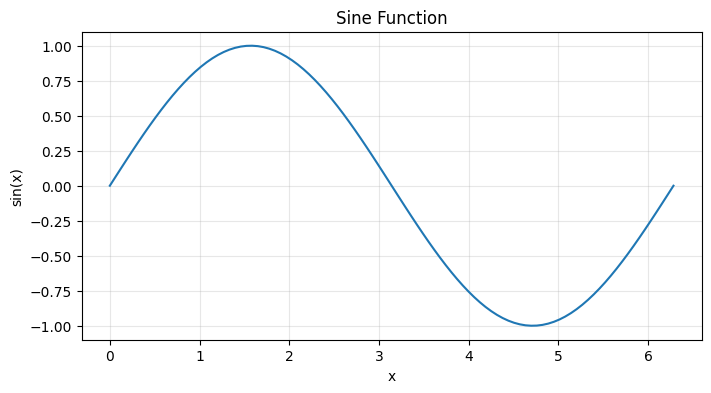

In [73]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 100)
y = np.sin(x)

plt.figure(figsize=(8, 4))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Sine Function')
plt.grid(True, alpha=0.3)
plt.show()

### Multiple Lines

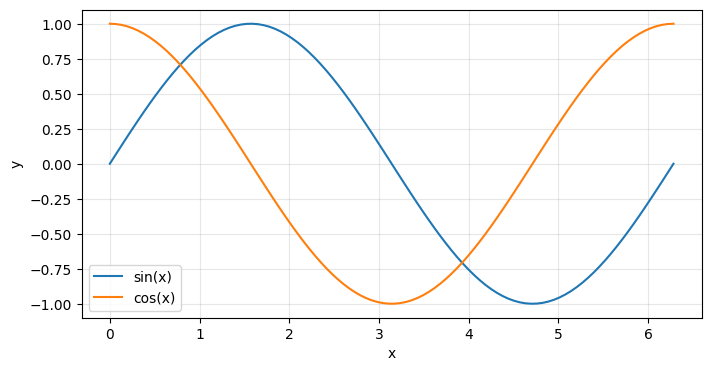

In [74]:
x = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize=(8, 4))
plt.plot(x, np.sin(x), label='sin(x)')
plt.plot(x, np.cos(x), label='cos(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Subplots

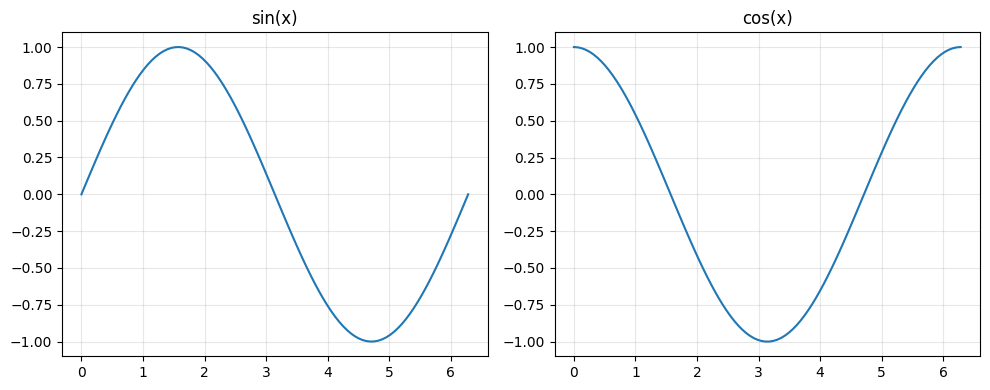

In [75]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

x = np.linspace(0, 2*np.pi, 100)

axes[0].plot(x, np.sin(x))
axes[0].set_title('sin(x)')
axes[0].grid(True, alpha=0.3)

axes[1].plot(x, np.cos(x))
axes[1].set_title('cos(x)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

---

## Styling and Customization

### Colors, Line Styles, and Markers

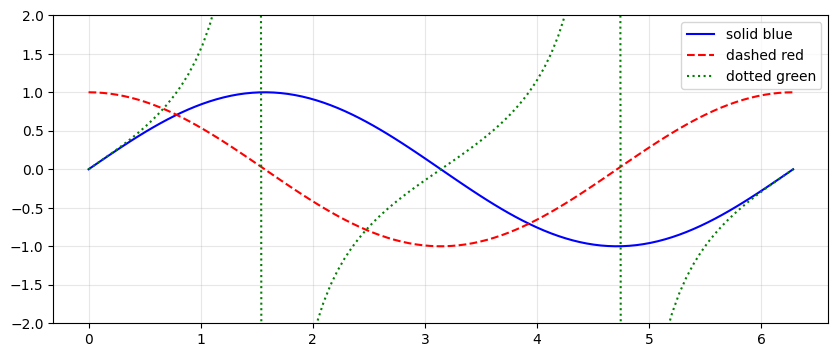

In [76]:
x = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize=(10, 4))
plt.plot(x, np.sin(x), 'b-', label='solid blue')
plt.plot(x, np.cos(x), 'r--', label='dashed red')
plt.plot(x, np.tan(x), 'g:', label='dotted green')
plt.ylim(-2, 2)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

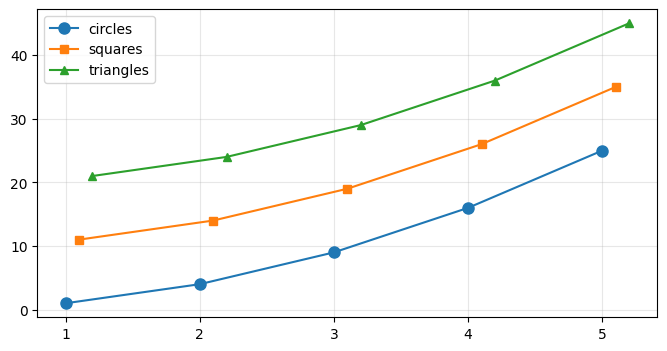

In [77]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1, 4, 9, 16, 25])

plt.figure(figsize=(8, 4))
plt.plot(x, y, 'o-', markersize=8, label='circles')
plt.plot(x+0.1, y+10, 's-', markersize=6, label='squares')
plt.plot(x+0.2, y+20, '^-', markersize=6, label='triangles')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---

## Common Plot Types

### Scatter Plots

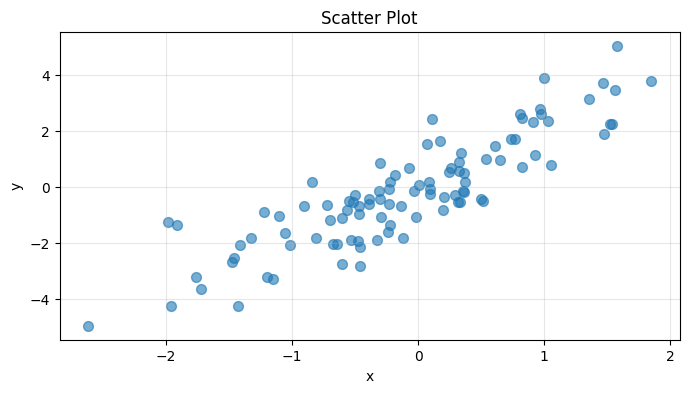

In [78]:
np.random.seed(42)
x = np.random.randn(100)
y = 2*x + np.random.randn(100)

plt.figure(figsize=(8, 4))
plt.scatter(x, y, alpha=0.6, s=50)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Scatter Plot')
plt.grid(True, alpha=0.3)
plt.show()

### Bar Plots

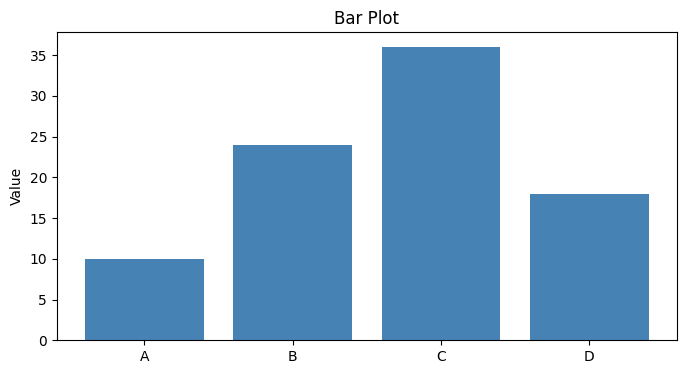

In [79]:
categories = ['A', 'B', 'C', 'D']
values = [10, 24, 36, 18]

plt.figure(figsize=(8, 4))
plt.bar(categories, values, color='steelblue')
plt.ylabel('Value')
plt.title('Bar Plot')
plt.show()

### Histograms

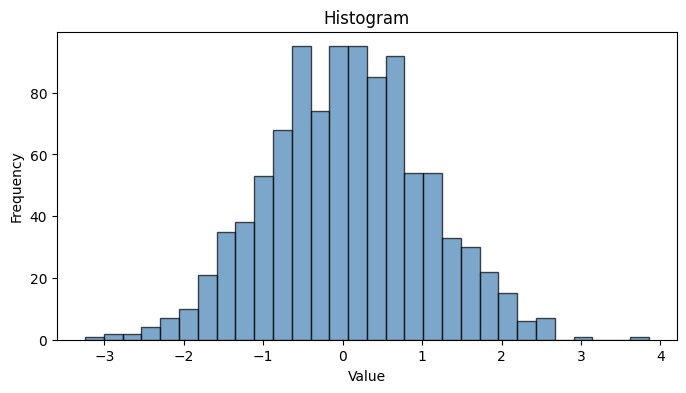

In [80]:
data = np.random.randn(1000)

plt.figure(figsize=(8, 4))
plt.hist(data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.show()

### Heatmaps

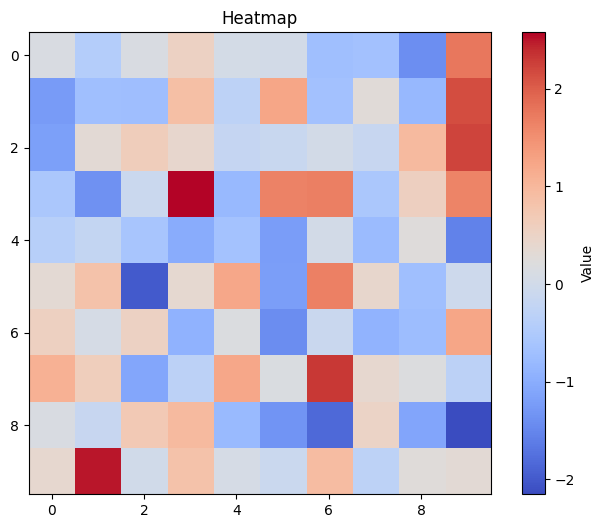

In [81]:
data = np.random.randn(10, 10)

plt.figure(figsize=(8, 6))
plt.imshow(data, cmap='coolwarm')
plt.colorbar(label='Value')
plt.title('Heatmap')
plt.show()